In [ ]:
from datetime import datetime
from datetime import date
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
import math
# from get_all_tickers import get_tickers as gt

In [ ]:
dict = ['GOOG', 'AAPL','MSFT','AMZN','NVDA', 'TSLA']
valid_Input = False

In [ ]:
# User ticker selection
while not valid_Input:
    x = 0
    val = -1
    tickerSelection = "|| "
    for tickers in dict:
        tickerSelection += tickers + " [" + str(x) + "] || "
        x += 1
    tickerSelection += "\n"
    try:
        val = int(input("Please enter the number for the ticker you would like to track: \n" + tickerSelection))
    except:
        print("Please input integer only...")
    # print("Yo"val)
    if val >= 0 and val <= len(dict) -1:
        valid_Input = True
    else:
        print("Invalid input please try again \n\n")

Please enter the number for the ticker you would like to track: 
|| GOOG [0] || AAPL [1] || MSFT [2] || AMZN [3] || NVDA [4] || TSLA [5] || 
5


[*********************100%***********************]  1 of 1 completed
165.0800018310547


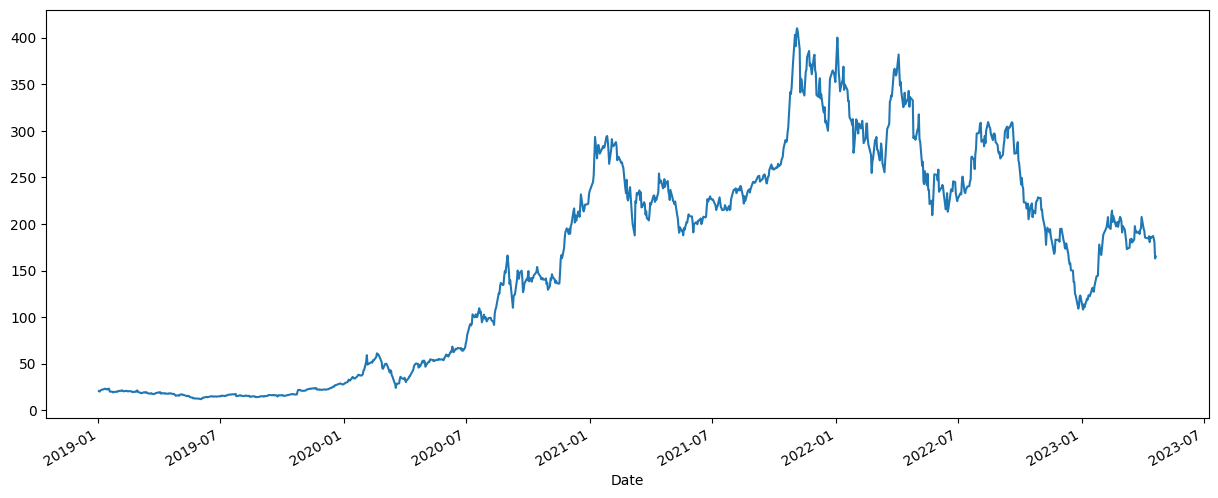

In [ ]:
# Ticker data pull
ticker =  dict[val]
start = datetime(2019, 1, 1)
end = date.today()
data = yf.download(ticker, start , end)['Adj Close']
data.plot(figsize=(15,6))
# print(len(data))
# print(data[len(data)-1])
current_price=data[len(data)-1]
print(current_price)
plt.show()

<ipython-input-42-1b55e9853368>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns.iloc[1:])


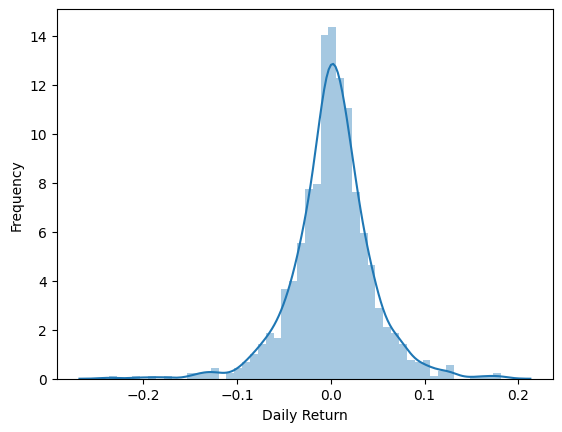

In [ ]:
# Plot daily log returns
log_returns = np.log(1 + data.pct_change())
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Probablitiy calculations
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
stdev = log_returns.std()

In [ ]:
# CAGR and initializations
days = 50
number_of_trials = 3000
time_elapsed = (data.index[-1] - data.index[0]).days
total_growth = (data[-1] / data[1])
number_of_years = time_elapsed / 365.0
cagr = total_growth ** (1/number_of_years) - 1
closing_prices = []
number_of_trading_days = 252

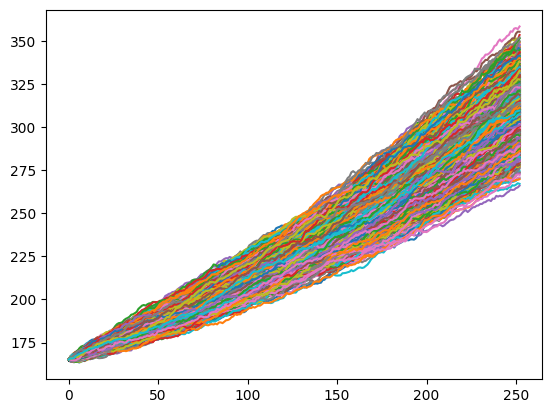

In [ ]:
# Daily return percentages for the next 50 days and Monte Carlo Sim
for i in range(number_of_trials):
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, stdev/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [data[-1]]

    for j in daily_return_percentages:
        price_series.append(price_series[-1] * j)
    closing_prices.append(price_series[-1])
    plt.plot(price_series)
plt.show()

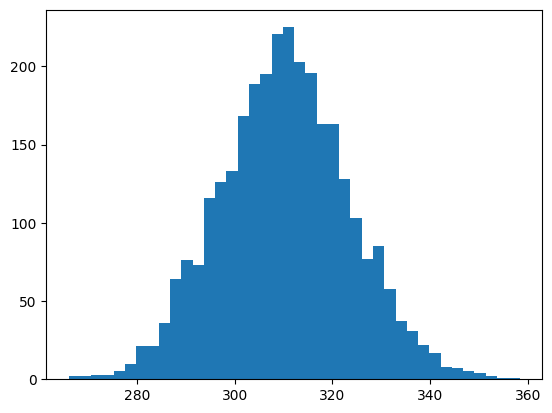

In [ ]:
# Histogram of 50 day returns
plt.hist(closing_prices,bins=40)
plt.show()

In [ ]:
# Expected price
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: $", str(mean_end_price))

if(mean_end_price > current_price):
    print("Buy the Stock")
else:
    print("Short/Sell the Stock")

Expected price: $ 310.3
Buy the Stock


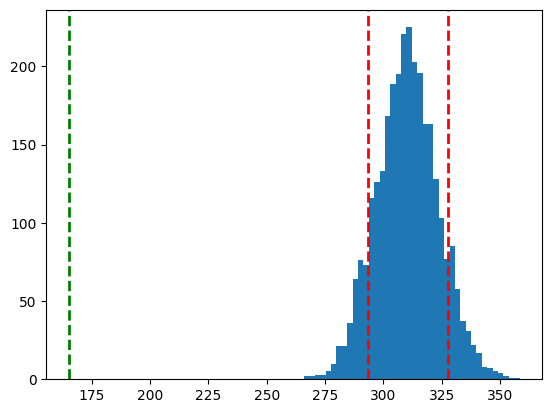

In [ ]:
# Modified histogram (Top & bottom 10 percentiles)
top_ten = np.percentile(closing_prices,100-10)
bottom_ten = np.percentile(closing_prices,10)
plt.hist(closing_prices,bins=40)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(data[-1],color='g', linestyle='dashed',linewidth=2)
plt.show()